# [Original Kaggle Link](https://www.kaggle.com/code/abhaymudgal/intrusion-detection-system)

# Settings

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
DATA_FOLDER = r'/content/drive/MyDrive/AppliedStatistics-DANDL-20212/data'
ZIP_FILE_PATH = DATA_FOLDER + r'/kdd-cup-1999.zip'
OUTPUT_UPZIP_FILE = DATA_FOLDER + r'/kdd-cup-1999/'

## Libraries


In [57]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

## Check folder

In [58]:
print(os.listdir(OUTPUT_UPZIP_FILE))

['corrected.gz', 'kddcup.data.corrected', 'kddcup.data.gz', 'kddcup.data_10_percent.gz', 'kddcup.data_10_percent_corrected', 'kddcup.names', 'kddcup.newtestdata_10_percent_unlabeled.gz', 'kddcup.testdata.unlabeled.gz', 'kddcup.testdata.unlabeled_10_percent.gz', 'typo-correction.txt', 'training_attack_types', 'corrected', 'kddcup.data', 'kddcup.data_10_percent', 'kddcup.newtestdata_10_percent_unlabeled', 'kddcup.testdata.unlabeled', 'kddcup.testdata.unlabeled_10_percent']


In [59]:
with open(OUTPUT_UPZIP_FILE + 'kddcup.names', 'r') as f:
  print(f.read()) 

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

## Data Cleaning

In [60]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""


columns = []
for c in cols.split(','):
    if(c.strip()):
      columns.append(c.strip())
columns.append('target')
print(len(columns))

42


In [61]:
with open(OUTPUT_UPZIP_FILE + 'training_attack_types' , 'r') as f:
  print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [62]:
attacks_types = {}
with open(OUTPUT_UPZIP_FILE + 'training_attack_types' , 'r') as f:
  for line in f.readlines():
    if(len(line.split(" ")) == 2):    
      key, value = line.split(" ")
      attacks_types[key.strip()] = value.strip()

In [63]:
attacks_types, len(attacks_types)

({'back': 'dos',
  'buffer_overflow': 'u2r',
  'ftp_write': 'r2l',
  'guess_passwd': 'r2l',
  'imap': 'r2l',
  'ipsweep': 'probe',
  'land': 'dos',
  'loadmodule': 'u2r',
  'multihop': 'r2l',
  'neptune': 'dos',
  'nmap': 'probe',
  'perl': 'u2r',
  'phf': 'r2l',
  'pod': 'dos',
  'portsweep': 'probe',
  'rootkit': 'u2r',
  'satan': 'probe',
  'smurf': 'dos',
  'spy': 'r2l',
  'teardrop': 'dos',
  'warezclient': 'r2l',
  'warezmaster': 'r2l'},
 22)

In [64]:
attacks_types['normal'] = 'normal'

In [65]:
TENPERCENT_PATH = OUTPUT_UPZIP_FILE + 'kddcup.data_10_percent/kddcup.data_10_percent'
df = pd.read_csv(TENPERCENT_PATH, names = columns)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [66]:
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

## Data Understanding

In [67]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [69]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
df.shape

(494021, 43)

In [71]:
## Example for one instance
df.loc[493801]

duration                             0
protocol_type                      tcp
service                           http
flag                                SF
src_bytes                          218
dst_bytes                          535
land                                 0
wrong_fragment                       0
urgent                               0
hot                                  0
num_failed_logins                    0
logged_in                            1
num_compromised                      0
root_shell                           0
su_attempted                         0
num_root                             0
num_file_creations                   0
num_shells                           0
num_access_files                     0
num_outbound_cmds                    0
is_host_login                        0
is_guest_login                       0
count                               23
srv_count                           23
serror_rate                        0.0
srv_serror_rate          

In [72]:
df['duration'].describe()

count    494021.000000
mean         47.979302
std         707.746472
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       58329.000000
Name: duration, dtype: float64

In [73]:
df['protocol_type'].describe()

count     494021
unique         3
top         icmp
freq      283602
Name: protocol_type, dtype: object

In [74]:
df['service'].describe()

count     494021
unique        66
top        ecr_i
freq      281400
Name: service, dtype: object

In [75]:
df['flag'].describe()

count     494021
unique        11
top           SF
freq      378440
Name: flag, dtype: object

In [76]:
df['count'].describe()

count    494021.000000
mean        332.285690
std         213.147412
min           0.000000
25%         117.000000
50%         510.000000
75%         511.000000
max         511.000000
Name: count, dtype: float64

In [77]:
df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [78]:
df['Attack Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

## Data Preprocessing

In [79]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [81]:
#Finding categorical features
num_cols = df._get_numeric_data().columns
cate_cols = list(set(df.columns) - set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['service', 'protocol_type', 'flag']

In [82]:
def bar_graph(feature):
  df[feature].value_counts().plot(kind= 'bar')

ecr_i      281400
private    110893
http        64293
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
pm_dump         1
tftp_u          1
red_i           1
Name: service, Length: 66, dtype: int64

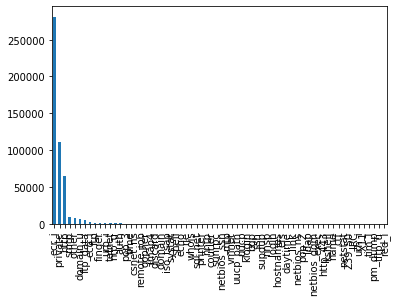

In [85]:
bar_graph('service')
df['service'].value_counts()

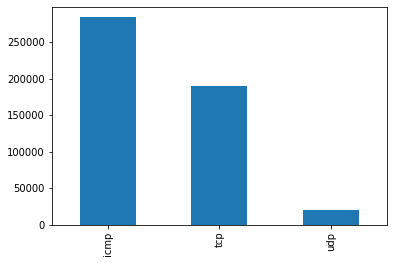

In [86]:
bar_graph('protocol_type')

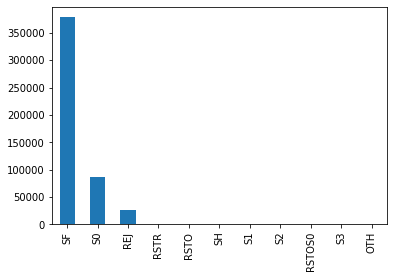

In [87]:
bar_graph('flag')

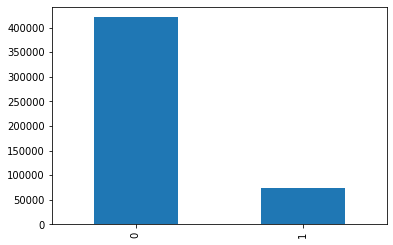

In [88]:
bar_graph('logged_in')

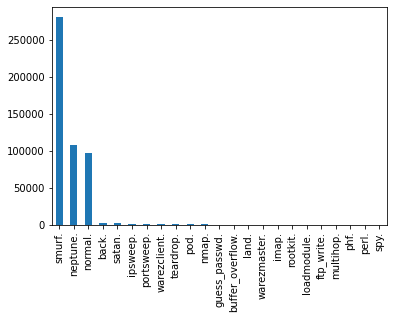

In [89]:
bar_graph('target')

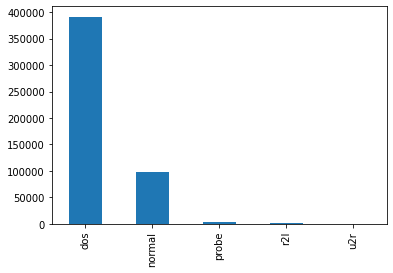

In [91]:
bar_graph('Attack Type')

In [92]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

In [93]:
## Data Correlation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """Entry point for launching an IPython kernel.


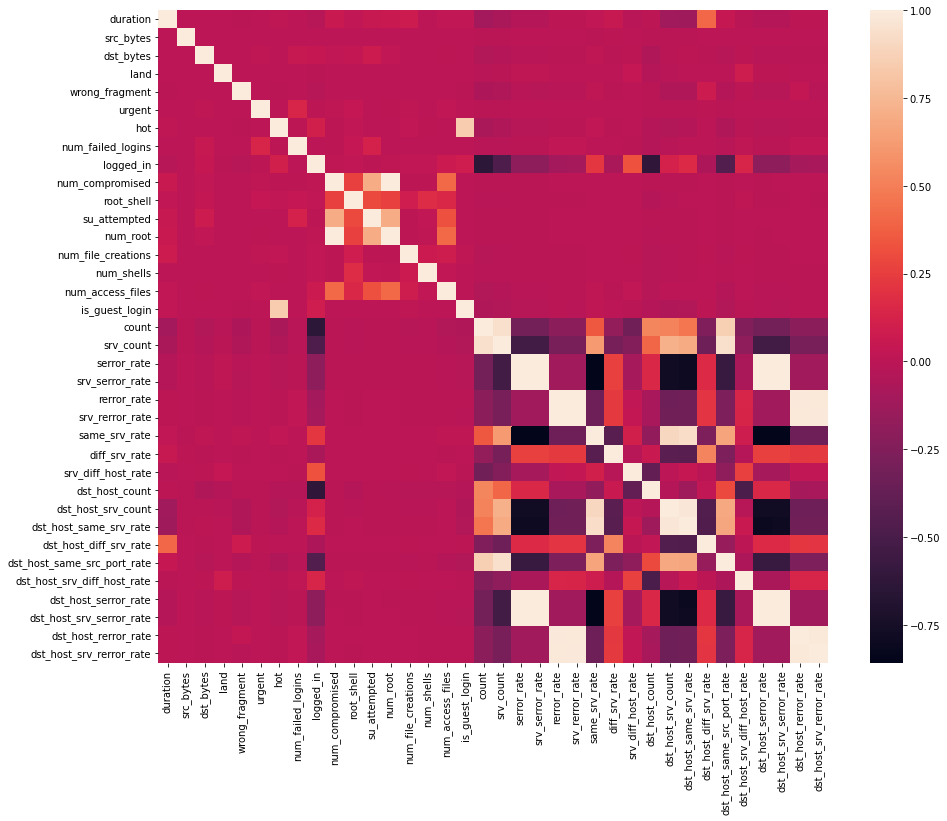

In [94]:
df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize = (15,12))

sns.heatmap(corr)

plt.show()

In [95]:
df['num_root'].corr(df['num_compromised'])

0.9938277978737916

In [96]:
df['srv_serror_rate'].corr(df['serror_rate'])

0.998361507272553

In [97]:
df['srv_count'].corr(df['count'])


0.9436670688882645

In [98]:
df['srv_rerror_rate'].corr(df['rerror_rate'])


0.9947309539818242

In [99]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])


0.9736854572953835

In [100]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])


0.9981559173373293

In [101]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])


0.9848038371110285

In [102]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])


0.9278080342690969

In [103]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])


0.8989546630323716

In [104]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])


0.944926367678324

In [105]:
df['dst_host_serror_rate'].corr(df['serror_rate'])



0.9986729680104371

In [106]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])


0.997849248567986

In [107]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])


0.999304109185027

In [108]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])


0.986994792495618

In [109]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])


0.9821663427308264

In [110]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])


0.9851995540751695

In [111]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])


0.9865705438845764

In [112]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)
#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9736854572953938)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [113]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [114]:
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
rerror_rate                         0.231623
logged_in                           0.355345
serror_rate                         0.380717
same_srv_rate                       0.388189
dst_host_same_src_port_rate         0.481309
hot                                 0.782103
num_compromised                     1.798326
dst_host_count                     64.745380
dst_host_s

In [115]:
df['protocol_type'].value_counts()


icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [116]:
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [117]:
df['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [118]:
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)


In [119]:
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,http,0,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,http,0,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,http,0,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,http,0,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,http,0,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [120]:
df.drop('service',axis = 1,inplace= True) # Imbalanced feature

In [121]:
df.shape


(494021, 32)

In [122]:
df.head()


,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,0,181,5450,0,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,0,235,1337,0,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,0,219,1337,0,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [123]:
df.dtypes


duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count           

## Modelling

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [125]:
df = df.drop('target', axis = 1)

In [126]:
df.shape

(494021, 31)

In [134]:
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)


(330994, 30) (163027, 30)
(330994, 1) (163027, 1)


## Gaussian naive bayes

In [135]:
from sklearn.naive_bayes import GaussianNB

In [136]:
model1 = GaussianNB()

In [142]:
start_time = time.time()
model1.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [143]:
print("Training time: ",end_time-start_time)


Training time:  1.238121747970581


In [144]:
start_time = time.time()
Y_test_pred1 = model1.predict(X_test)
end_time = time.time()

In [145]:
print("Testing time: ",end_time-start_time)


Testing time:  0.26589322090148926


In [146]:
print("Train score is:", model1.score(X_train, Y_train))
print("Test score is:",model1.score(X_test,Y_test))

Train score is: 0.8879979697517175
Test score is: 0.8868224281867421


## Desicion Tree

In [147]:
from sklearn.tree import DecisionTreeClassifier


In [148]:
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [149]:
start_time = time.time()
model2.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [151]:
print("Training time: ",end_time-start_time)


Training time:  2.3154568672180176


In [152]:
start_time = time.time()
Y_test_pred2 = model2.predict(X_test)
end_time = time.time()

In [153]:
print("Testing time: ",end_time-start_time)


Testing time:  0.052159786224365234


In [154]:
print("Train score is:", model2.score(X_train, Y_train))
print("Test score is:",model2.score(X_test,Y_test))


Train score is: 0.9906554197357051
Test score is: 0.9903758273169475


## RANDOM FOREST



In [155]:
from sklearn.ensemble import RandomForestClassifier


In [156]:
model3 = RandomForestClassifier(n_estimators=30)


In [157]:
start_time = time.time()
model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [158]:
print("Training time: ",end_time-start_time)


Training time:  21.763648509979248


In [159]:
start_time = time.time()
Y_test_pred3 = model3.predict(X_test)
end_time = time.time()

In [160]:
print("Testing time: ",end_time-start_time)


Testing time:  0.9847023487091064


In [161]:
print("Train score is:", model3.score(X_train, Y_train))
print("Test score is:",model3.score(X_test,Y_test))


Train score is: 0.9999818727831924
Test score is: 0.9997301060560521


## SVM

In [162]:
from sklearn.svm import SVC
model4 = SVC(gamma = 'scale')

In [163]:
start_time = time.time()
model4.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [164]:
print("Training time: ",end_time-start_time)

Training time:  754.0067205429077


In [165]:
start_time = time.time()
Y_test_pred4 = model4.predict(X_test)
end_time = time.time()

In [166]:
print("Testing time: ",end_time-start_time)


Testing time:  70.2988510131836


In [167]:
print("Train score is:", model4.score(X_train, Y_train))
print("Test score is:", model4.score(X_test,Y_test))

Train score is: 0.9986797343758497
Test score is: 0.9988958884111221


## LOGISTIC REGRESSION



In [168]:
from sklearn.linear_model import LogisticRegression


In [169]:
model5 = LogisticRegression(max_iter=1200000)


In [170]:
start_time = time.time()
model5.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [171]:
print("Training time: ",end_time-start_time)


Training time:  79.38379216194153


In [172]:
start_time = time.time()
Y_test_pred5 = model5.predict(X_test)
end_time = time.time()

In [173]:
print("Testing time: ",end_time-start_time)


Testing time:  0.059708356857299805


In [174]:
print("Train score is:", model5.score(X_train, Y_train))
print("Test score is:",model5.score(X_test,Y_test))


Train score is: 0.993392629473646
Test score is: 0.9938231090555553


## GRADIENT BOOSTING CLASSIFIER



In [175]:
from sklearn.ensemble import GradientBoostingClassifier


In [176]:
model6 = GradientBoostingClassifier(random_state=0)


In [177]:
start_time = time.time()
model6.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [178]:
print("Training time: ",end_time-start_time)


Training time:  478.4423580169678


In [179]:
start_time = time.time()
Y_test_pred6 = model6.predict(X_test)
end_time = time.time()

In [180]:
print("Testing time: ",end_time-start_time)


Testing time:  1.9978985786437988


In [181]:
print("Train score is:", model6.score(X_train, Y_train))
print("Test score is:", model6.score(X_test,Y_test))


Train score is: 0.9989909182643795
Test score is: 0.9988958884111221
